# Carga del archivo, remplazo de columnas y verificación

In [1]:
import pandas as pd

# Cargar el archivo CSV desde la ruta especificada
games_df = pd.read_csv('/datasets/games.csv')

# Reemplazar los nombres de las columnas con minúsculas
games_df.columns = games_df.columns.str.lower()

# Verificar el cambio
print(games_df.head())

print(games_df.info())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

# Conversión de tipos, remplazo con Nan, conversión a float y eliminación de filas con valores nulos

In [2]:
# Convertir los tipos de datos numéricos
games_df['year_of_release'] = pd.to_numeric(games_df['year_of_release'], errors='coerce')
games_df['na_sales'] = pd.to_numeric(games_df['na_sales'], errors='coerce')
games_df['eu_sales'] = pd.to_numeric(games_df['eu_sales'], errors='coerce')
games_df['jp_sales'] = pd.to_numeric(games_df['jp_sales'], errors='coerce')
games_df['other_sales'] = pd.to_numeric(games_df['other_sales'], errors='coerce')
games_df['critic_score'] = pd.to_numeric(games_df['critic_score'], errors='coerce')

# Convertir 'year_of_release' a entero
games_df['year_of_release'] = games_df['year_of_release'].astype('Int64')

# Convertir 'user_score', reemplazando 'tbd' con NaN y luego convertir a float
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')

# Mostrar la información del DataFrame después de las conversiones
print(games_df.info())

# Eliminar filas con valores nulos en columnas críticas (name, genre, year_of_release)
games_df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

# Verificar el resultado
print(games_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             164

#Cambié user_score de object a float64 para realizar cálculos numéricos y análisis estadísticos. Al tratarse de una puntuación, es lógico representarla como un número.

#Aunque el año se representó inicialmente como float64, es más lógico representarlo como un tipo entero (Int64) porque el año no tiene decimales. Esto también facilitaría su uso en análisis relacionados con el tiempo (como filtrar por rangos de años).

## Tratamiento de valores ausentes

#critic_score: Tiene 7,983 valores no nulos, lo que indica que hay 8,461 valores nulos en esta columna.
user_score: Tiene 7,463 valores no nulos, lo que significa que hay 8,981 valores nulos.
rating: Tiene 9,768 valores no nulos, lo que significa que hay 6,676 valores nulos.

In [3]:
print(games_df['critic_score'].describe())

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


#Dado que tengo un outlier bajo en critic_score y una distribución que podría no ser simétrica, la mediana será la mejor opción para rellenar valores vacíos en este caso.

In [4]:
# Rellenar valores vacíos en critic_score con la mediana
median_value = games_df['critic_score'].median()
games_df['critic_score'].fillna(median_value, inplace=True)

In [5]:
print(games_df['user_score'].describe())

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64


#De igual manera, en el caso de user_score, la mediana también es la mejor opción.

In [6]:
# Rellenar valores vacíos en user_score con la mediana
median_user_score = games_df['user_score'].median()
games_df['user_score'].fillna(median_user_score, inplace=True)

In [7]:
print(games_df['rating'].describe())

count     9768
unique       8
top          E
freq      3921
Name: rating, dtype: object


Dado que rating es una variable categórica, el método más apropiado para rellenar valores vacíos sería utilizar la moda (el valor más frecuente). En este caso, 'E' es la moda y, por lo tanto, representa la calificación más común entre los videojuegos en el conjunto de datos.

In [8]:
# Rellenar valores vacíos en rating con la moda
mode_rating = games_df['rating'].mode()[0]  # Obtiene la moda
games_df['rating'].fillna(mode_rating, inplace=True)

#Verificación de valores nulos

In [9]:
# Verificar la cantidad de valores nulos en cada columna
null_counts = games_df.isnull().sum()

# Mostrar los resultados
print(null_counts)

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


#Los valores ausentes pueden deberse a errores en la entrada de datos o falta de información.

#En el caso de "TBD", es decir, información pendiente que no podrá utilizarse como datos válidos, lo mejor es remplazarlo como NaN para que sean tratados como valores ausentes.

In [10]:
games_df.replace('TBD', pd.NA, inplace=True)
print(games_df.info())
print(games_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB
None
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating          

## Cálculo de ventas totales de cada juego

In [11]:
# Calcular las ventas totales sumando las ventas de todas las regiones
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Verificar los resultados
print(games_df[['name', 'total_sales']].head())

                       name  total_sales
0                Wii Sports        82.54
1         Super Mario Bros.        40.24
2            Mario Kart Wii        35.52
3         Wii Sports Resort        32.77
4  Pokemon Red/Pokemon Blue        31.38


## Análisis de los datos

#Ver cuántos juegos fueron lanzados en diferentes años.

In [12]:
# Contar cuántos juegos fueron lanzados en cada año
games_per_year = games_df['year_of_release'].value_counts().sort_index()

# Mostrar los resultados
print(games_per_year)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


#Crear un gráfico puede ser útil para visualizar los resultados.

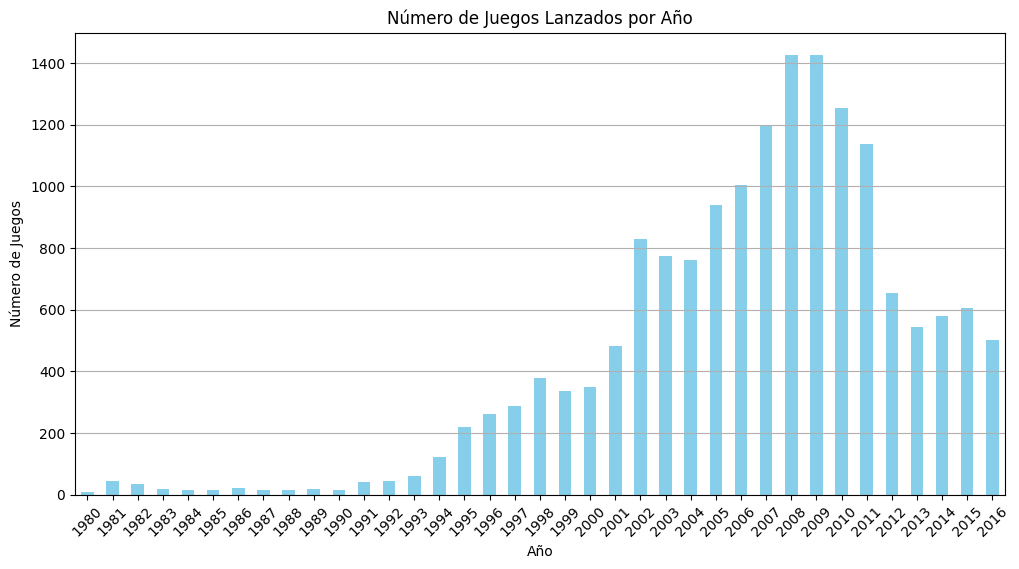

In [13]:
import matplotlib.pyplot as plt

# Graficar el número de juegos lanzados por año
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#Esto indica que del año 2001 al 2011 hubo un aumento evidente en los lanzamientos de videojuegos, con 2008 como año auge.

# Variación de ventas de una plataforma a otra.

   platform  total_na_sales  total_eu_sales  total_jp_sales  \
0      2600           80.78            4.86            0.00   
1       3DO            0.00            0.00            0.10   
2       3DS           82.65           61.27          100.62   
3        DC            5.43            1.69            8.56   
4        DS          380.31          188.41          175.02   
5        GB          113.64           47.51           85.12   
6       GBA          184.12           74.59           46.56   
7        GC          131.94           38.32           21.34   
8       GEN           19.27            5.52            2.67   
9        GG            0.00            0.00            0.04   
10      N64          138.91           41.03           33.76   
11      NES          125.94           21.15           98.65   
12       NG            0.00            0.00            1.44   
13       PC           93.34          140.37            0.17   
14     PCFX            0.00            0.00            

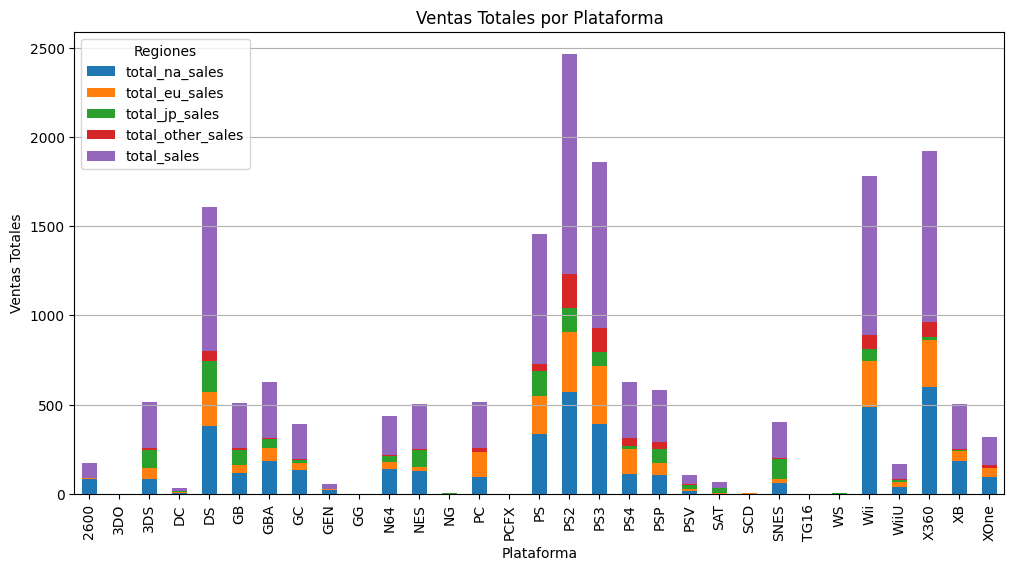

In [14]:
# Calcular las ventas totales por plataforma
sales_by_platform = games_df.groupby('platform').agg(
    total_na_sales=('na_sales', 'sum'),
    total_eu_sales=('eu_sales', 'sum'),
    total_jp_sales=('jp_sales', 'sum'),
    total_other_sales=('other_sales', 'sum'),
    total_sales=('total_sales', 'sum')
).reset_index()

# Mostrar el DataFrame de ventas por plataforma
print(sales_by_platform)

# Graficar la variación de ventas por plataforma
sales_by_platform.plot(x='platform', kind='bar', stacked=True, figsize=(12, 6),
                       title='Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.legend(title='Regiones')
plt.grid(axis='y')
plt.show()

# Elección de las plataformas con las mayores ventas totales y construcción de una distribución basada en los datos de cada año. 

platform           3DS      DS    GBA      PS     PS2     PS3     PS4    PSP  \
year_of_release                                                                
1985              0.00    0.02   0.00    0.00    0.00    0.00    0.00   0.00   
1994              0.00    0.00   0.00    6.03    0.00    0.00    0.00   0.00   
1995              0.00    0.00   0.00   35.96    0.00    0.00    0.00   0.00   
1996              0.00    0.00   0.00   94.70    0.00    0.00    0.00   0.00   
1997              0.00    0.00   0.00  136.17    0.00    0.00    0.00   0.00   
1998              0.00    0.00   0.00  169.49    0.00    0.00    0.00   0.00   
1999              0.00    0.00   0.00  144.53    0.00    0.00    0.00   0.00   
2000              0.00    0.00   0.07   96.37   39.17    0.00    0.00   0.00   
2001              0.00    0.00  61.53   35.59  166.43    0.00    0.00   0.00   
2002              0.00    0.00  74.16    6.67  205.38    0.00    0.00   0.00   
2003              0.00    0.00  56.67   

<Figure size 1400x800 with 0 Axes>

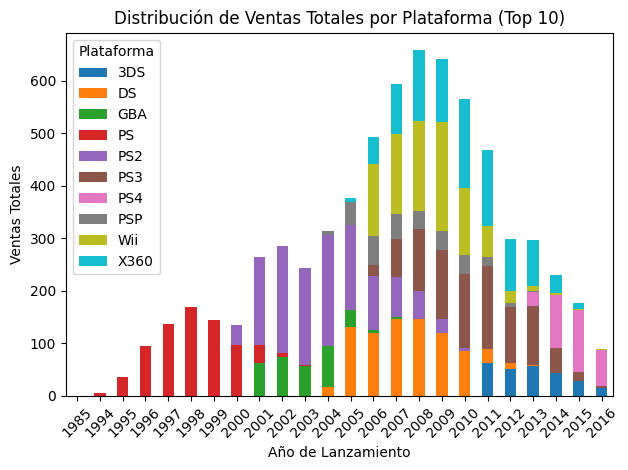

In [15]:
# Calcular las ventas totales por plataforma
platform_sales = games_df.groupby('platform')['total_sales'].sum().reset_index()

# Ordenar las plataformas por ventas totales
top_platforms = platform_sales.sort_values(by='total_sales', ascending=False).head(10)  # Selecciona las 10 plataformas con mayores ventas

# Filtrar el DataFrame original para incluir solo las plataformas seleccionadas
top_platforms_list = top_platforms['platform'].tolist()
sales_by_top_platforms = games_df[games_df['platform'].isin(top_platforms_list)]

# Crear un DataFrame que contenga las ventas totales por año y por plataforma
sales_distribution = sales_by_top_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

print(sales_distribution)

# Graficar la distribución de ventas
plt.figure(figsize=(14, 8))
sales_distribution.plot(kind='bar', stacked=True)
plt.title('Distribución de Ventas Totales por Plataforma (Top 10)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()

#¿Cuáles son las plataformas que solían ser populares y ya no lo son?
#PS, PS2 y GBA son las plataformas que solían ser populares en años pasados.
#En promedio, parece que las nuevas plataformas y las viejas aparecen y desaparecen apróximadamente en periodos de cinco años.

#Con base en esa respuesta, tomaré en cuenta los datos desde el año 2012 para crear un modelo en 2017.

#Las plataformas líderes en ventas en esos años son: 3DS, PS4, X360 y PS3.

#La plataforma que crece es PS4 y 3DS muestra cierta constancia. Por otro lado, se reducen plataformas como PS3 y X360.

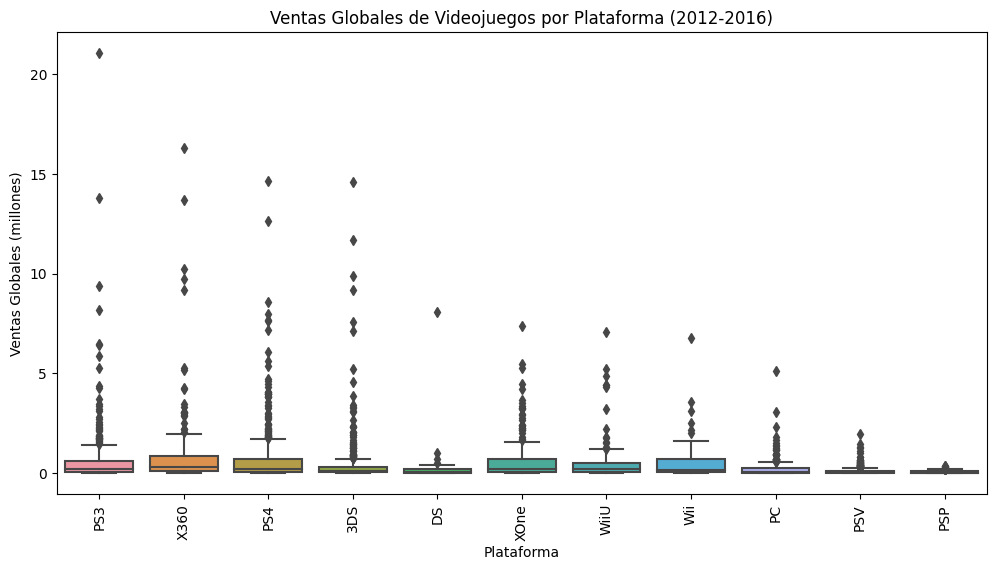

   platform  total_sales
16      PS3        21.05
23     X360        16.27
31      PS4        14.63
33      3DS        14.60
34      PS3        13.79
       total_sales
count  2886.000000
mean      0.501223
std       1.249157
min       0.010000
25%       0.040000
50%       0.120000
75%       0.430000
max      21.050000


In [16]:
import seaborn as sns
# Filtrar datos para el periodo 2012-2016
filtered_data = games_df[(games_df['year_of_release'] >= 2012) & (games_df['year_of_release'] <= 2016)]

# Crear el diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='platform', y='total_sales')
plt.title('Ventas Globales de Videojuegos por Plataforma (2012-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=90)
plt.show()

print(filtered_data[['platform', 'total_sales']].head())  # Muestra las primeras filas
print(filtered_data[['platform', 'total_sales']].describe())  # Muestra el resumen estadístico

#Las diferencias en las ventas son significativas. La desviación estándar de 1.25 millones indica una dispersión considerable alrededor de la media de 0.50 millones, lo que sugiere que las ventas de los juegos varían bastante. Mientras que algunos juegos venden cerca del promedio, otros están muy por encima o por debajo.

#El rango entre las ventas mínimas (0.01 millones) y las máximas (21.05 millones) es enorme, lo que implica que solo un pequeño grupo de juegos logra un éxito masivo en ventas, mientras que la mayoría tiene ventas mucho más bajas.

#El hecho de que el 75% de los juegos vendan menos de 0.43 millones, pero algunos lleguen a más de 21 millones, muestra que hay grandes diferencias entre los juegos de mayor y menor éxito.

#Solo un pequeño número de juegos logra un éxito masivo, mientras que la mayoría tiene ventas modestas.

#El promedio de ventas es de 0.50 millones de copias por juego, lo cual es relativamente bajo comparado con los máximos. En general, la mayoría de los juegos no alcanzan ventas masivas.

#La alta desviación estándar (1.25 millones) y la diferencia entre el promedio y las ventas máximas (21.05 millones) sugieren que solo unos pocos juegos muy exitosos elevan las cifras de ventas totales en algunas plataformas, mientras que la mayoría de los juegos venden mucho menos que este promedio.

#Algunas plataformas, como PlayStation y Xbox, tienden a tener algunos juegos con ventas mucho más altas que otras plataformas. Esto refleja que los juegos más populares se concentran en plataformas específicas, lo que crea disparidades entre las plataformas.

#Un pequeño porcentaje de juegos generan la mayoría de las ventas. Esto suele ser el caso en plataformas con grandes títulos franquicia o éxitos de renombre.

En resumen, las ventas promedio en varias plataformas muestran que hay una alta concentración de ventas en unos pocos juegos, y que el éxito de las plataformas depende de unos cuantos títulos muy vendidos.

## Análisis de una plataforma en particular y su relación con las ventas y las reseñas

#Elegí la plataforma X360.

In [17]:
# Filtrar los datos para la plataforma X360
x360_df = games_df[games_df['platform'] == 'X360']

# Calcular la correlación entre las reseñas de usuarios y las ventas totales
user_sales_corr = x360_df['user_score'].corr(x360_df['total_sales'])

# Calcular la correlación entre las reseñas de críticos y las ventas totales
critic_sales_corr = x360_df['critic_score'].corr(x360_df['total_sales'])

# Descripción estadística para las reseñas de usuarios, críticos y las ventas totales
user_score_stats = x360_df['user_score'].describe()
critic_score_stats = x360_df['critic_score'].describe()
sales_stats = x360_df['total_sales'].describe()

# Mostrar los resultados
print("Correlación entre User Score y Total Sales:", user_sales_corr)
print("Correlación entre Critic Score y Total Sales:", critic_sales_corr)
print("\nDescripción estadística de User Score:")
print(user_score_stats)
print("\nDescripción estadística de Critic Score:")
print(critic_score_stats)
print("\nDescripción estadística de Total Sales:")
print(sales_stats)

Correlación entre User Score y Total Sales: 0.059028381219937434
Correlación entre Critic Score y Total Sales: 0.3606494835478315

Descripción estadística de User Score:
count    1232.000000
mean        6.871591
std         1.311093
min         0.700000
25%         6.300000
50%         7.500000
75%         7.500000
max         9.000000
Name: user_score, dtype: float64

Descripción estadística de Critic Score:
count    1232.000000
mean       69.320617
std        12.894257
min        19.000000
25%        64.000000
50%        71.000000
75%        77.000000
max        98.000000
Name: critic_score, dtype: float64

Descripción estadística de Total Sales:
count    1232.000000
mean        0.780227
std         1.632122
min         0.010000
25%         0.110000
50%         0.280000
75%         0.770000
max        21.820000
Name: total_sales, dtype: float64


# Creación de un gráfico de dispersión y cálculo de la correlación entre las reseñas y las ventas.

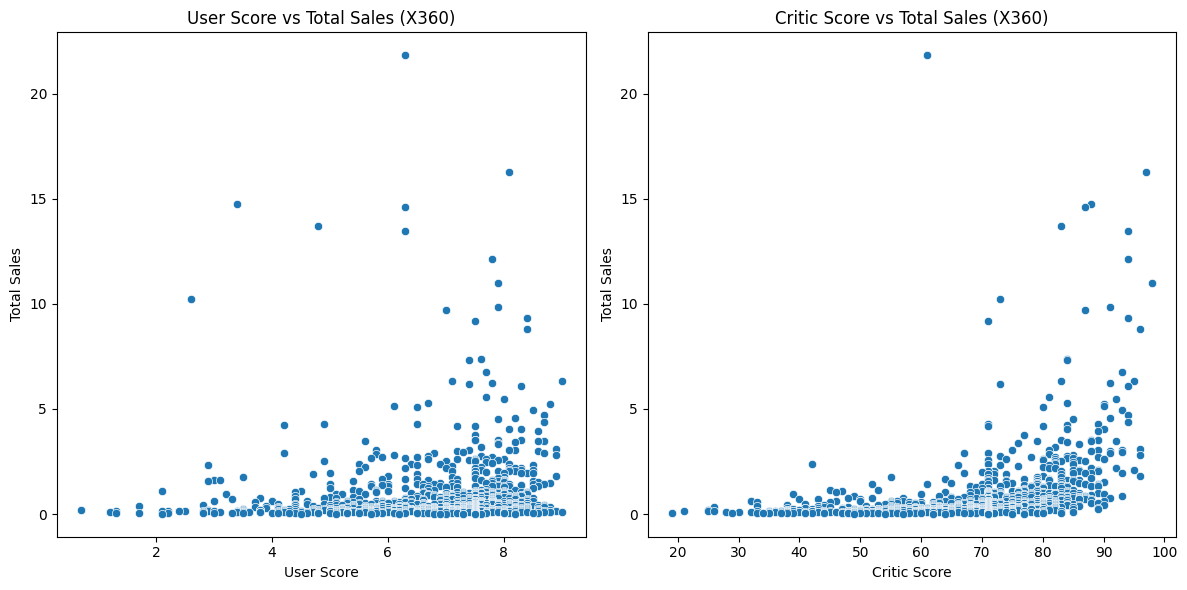

In [18]:
# Gráfico de dispersión User Score vs Total Sales
plt.figure(figsize=(12, 6))

# Dispersión para User Score
plt.subplot(1, 2, 1)
sns.scatterplot(x='user_score', y='total_sales', data=x360_df)
plt.title('User Score vs Total Sales (X360)')
plt.xlabel('User Score')
plt.ylabel('Total Sales')

# Dispersión para Critic Score
plt.subplot(1, 2, 2)
sns.scatterplot(x='critic_score', y='total_sales', data=x360_df)
plt.title('Critic Score vs Total Sales (X360)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

#Conclusiones de ese análisis

#La correlación es de 0.059, lo que indica una relación muy débil entre las reseñas de los usuarios y las ventas totales. Esto sugiere que las puntuaciones de los usuarios no tienen un impacto significativo en las ventas de juegos para la plataforma X360.

#La correlación es de 0.36, lo que sugiere una relación moderada positiva entre las reseñas de los críticos y las ventas totales. Esto significa que a medida que aumentan las reseñas de los críticos, tiende a haber un aumento en las ventas, aunque la relación no es extremadamente fuerte.

#La puntuación media de los usuarios es de 6.87, con una desviación estándar de 1.31, lo que indica que la mayoría de las puntuaciones están cerca del valor medio, pero hay algunos juegos con puntuaciones muy bajas (mínimo de 0.7) y algunos con puntuaciones más altas (máximo de 9).

#La puntuación media de los críticos es de 69.32 con una desviación estándar de 12.89. La mayoría de las puntuaciones se encuentran entre 64 y 77 (percentiles 25 y 75), lo que sugiere que los críticos son más consistentes en sus reseñas en comparación con los usuarios.

#Las ventas promedio son de 0.78 millones de unidades, pero con una desviación estándar de 1.63, lo que significa que algunas ventas están muy por encima de la media. El máximo valor de ventas es de 21.82 millones, lo que sugiere que algunos juegos son grandes éxitos, mientras que la mayoría vende mucho menos (el 50% de los juegos tiene ventas por debajo de 0.28 millones).

#Parece que las reseñas de los críticos tienen un mayor impacto en las ventas que las de los usuarios, pero ninguno de los dos factores es determinante por sí solo. Las ventas varían significativamente de un juego a otro.

## Comparación de las ventas de los juegos más populares en otras plataformas

In [19]:
# Definir un umbral para considerar un juego como popular
sales_threshold = 1.0  # Ventas mínimas en millones para considerar el juego popular

# Filtrar los datos para la plataforma X360
x360_games = games_df[games_df['platform'] == 'X360']

# Filtrar solo los juegos que tienen ventas totales mayores al umbral
popular_x360_games = x360_games[x360_games['total_sales'] >= sales_threshold]['name']

# Filtrar los juegos que están disponibles en X360 y otras plataformas
comparison_df = games_df[games_df['name'].isin(popular_x360_games)]

# Agrupar los datos por juego y plataforma, sumando las ventas totales
sales_comparison = comparison_df.groupby(['name', 'platform'])['total_sales'].sum().unstack()

# Mostrar el DataFrame de comparación de ventas
print(sales_comparison)

platform                                            3DS    DS  GBA  GC  GEN  \
name                                                                          
007: Quantum of Solace                              NaN  0.13  NaN NaN  NaN   
Ace Combat 6: Fires of Liberation                   NaN   NaN  NaN NaN  NaN   
Alan Wake                                           NaN   NaN  NaN NaN  NaN   
Aliens vs Predator                                  NaN   NaN  NaN NaN  NaN   
Army of Two                                         NaN   NaN  NaN NaN  NaN   
...                                                 ...   ...  ...  ..  ...   
Winning Eleven: Pro Evolution Soccer 2007 (All ...  NaN   NaN  NaN NaN  NaN   
Your Shape: Fitness Evolved                         NaN   NaN  NaN NaN  NaN   
Your Shape: Fitness Evolved 2012                    NaN   NaN  NaN NaN  NaN   
Zumba Fitness                                       NaN   NaN  NaN NaN  NaN   
[Prototype]                                         

<Figure size 1200x600 with 0 Axes>

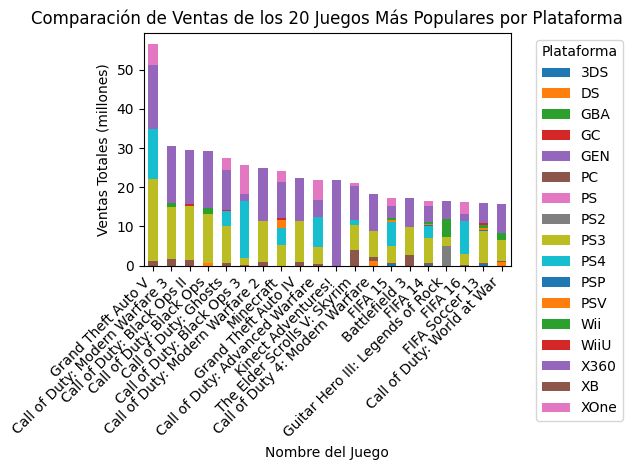

In [20]:
# Limitar a los 20 juegos más populares según sus ventas totales
top_20_sales = sales_comparison.sum(axis=1).nlargest(20).index
sales_comparison_top_20 = sales_comparison.loc[top_20_sales]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sales_comparison_top_20.plot(kind='bar', stacked=True)

# Personalizar el gráfico
plt.title('Comparación de Ventas de los 20 Juegos Más Populares por Plataforma')
plt.xlabel('Nombre del Juego')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45, ha='right')

# Mover la leyenda fuera del gráfico
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Mostrar el gráfico
plt.show()

#Esto demuestra que la popularidad en ventas de los juegos más importantes no dependen tanto de la plataforma.

## Distribución general de los juegos por género

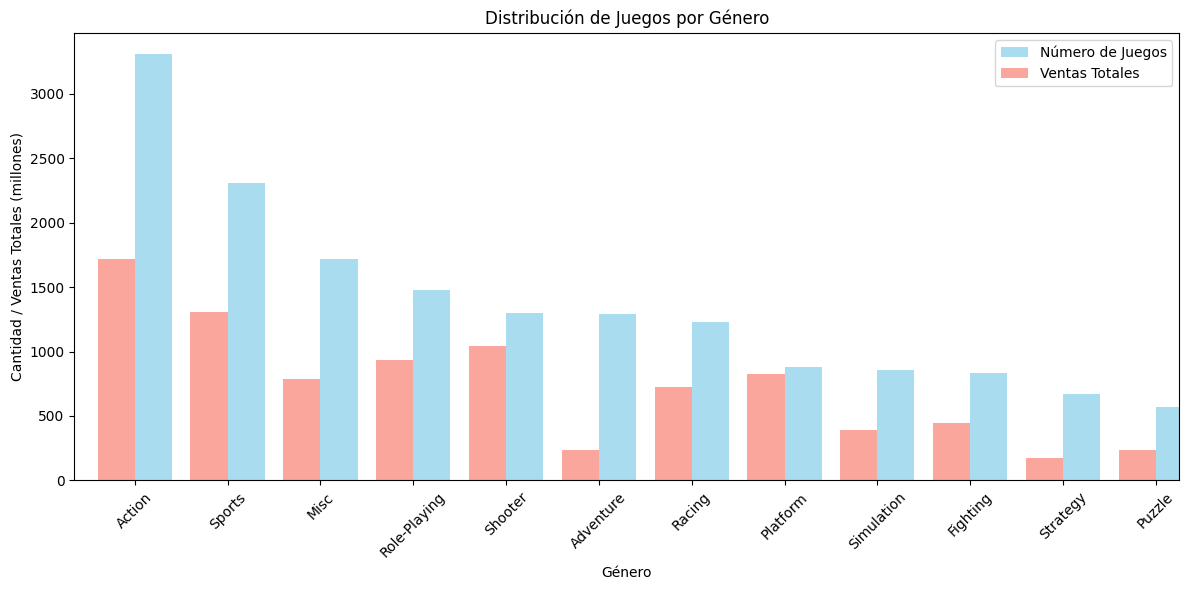

              Number of Games  Total Sales (millions)
genre                                                
Action                   3307                 1716.52
Sports                   2306                 1309.67
Misc                     1721                  790.29
Role-Playing             1481                  931.08
Shooter                  1296                 1041.36
Adventure                1293                  233.33
Racing                   1226                  723.49
Platform                  878                  825.55
Simulation                857                  387.96
Fighting                  837                  442.66
Strategy                  673                  172.57
Puzzle                    569                  239.89


In [21]:
# Agrupar los datos por género y contar la cantidad de juegos por género
genre_distribution = games_df.groupby('genre').size()

# Calcular las ventas totales por género
total_sales_by_genre = games_df.groupby('genre')['total_sales'].sum()

# Crear un DataFrame para combinar ambos resultados
genre_analysis = pd.DataFrame({
    'Number of Games': genre_distribution,
    'Total Sales (millions)': total_sales_by_genre
})

# Ordenar por el número de juegos
genre_analysis = genre_analysis.sort_values(by='Number of Games', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))

# Crear dos ejes y graficar
ax1 = genre_analysis['Number of Games'].plot(kind='bar', color='skyblue', alpha=0.7, position=0, width=0.4, label='Número de Juegos')
ax2 = genre_analysis['Total Sales (millions)'].plot(kind='bar', color='salmon', alpha=0.7, position=1, width=0.4, label='Ventas Totales')

# Personalizar el gráfico
plt.title('Distribución de Juegos por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad / Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.legend()

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Mostrar la tabla de análisis
print(genre_analysis)

#Los géneros más rentables con los de acción, deportes y tirador.

#En general, los juegos más "pasivos" (rompecabezas, estrategia, simulación e incluso peleas, pues en ellos solo hay una escena con dos personajes peleando cada vez) muestan menores ventas, mientras que los juegos con participación más activa, como los más rentables, tienden a tener mejores ventas. Además, esos juegos con pocas ventas, incluyendo también el género de "aventura" tienen más titulos que ventas.

## Creación de un perfil de usuario para cada región

#Para saber cuáles son las plataformas principales en cada región, sugiero calcular las ventas de cada plataforma para sacar las cinco principales. Después, podré comparar las cuotas de mercado en las distintas regiones (NA, UE y JP).

In [22]:
# Sumar las ventas por plataforma y región
platform_sales_by_region = games_df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Calcular las cuotas de mercado para cada región
platform_sales_by_region['Total'] = platform_sales_by_region.sum(axis=1)
platform_sales_by_region['NA Market Share'] = platform_sales_by_region['na_sales'] / platform_sales_by_region['Total'] * 100
platform_sales_by_region['EU Market Share'] = platform_sales_by_region['eu_sales'] / platform_sales_by_region['Total'] * 100
platform_sales_by_region['JP Market Share'] = platform_sales_by_region['jp_sales'] / platform_sales_by_region['Total'] * 100

# Obtener las cinco plataformas principales por región
top_5_na = platform_sales_by_region[['na_sales', 'NA Market Share']].nlargest(5, 'na_sales')
top_5_eu = platform_sales_by_region[['eu_sales', 'EU Market Share']].nlargest(5, 'eu_sales')
top_5_jp = platform_sales_by_region[['jp_sales', 'JP Market Share']].nlargest(5, 'jp_sales')

# Mostrar los resultados
print("Top 5 Plataformas en NA:")
print(top_5_na)

print("\nTop 5 Plataformas en EU:")
print(top_5_eu)

print("\nTop 5 Plataformas en JP:")
print(top_5_jp)

# Comparar las cuotas de mercado
market_share_comparison = pd.DataFrame({
    'NA Market Share': platform_sales_by_region['NA Market Share'],
    'EU Market Share': platform_sales_by_region['EU Market Share'],
    'JP Market Share': platform_sales_by_region['JP Market Share']
}).loc[top_5_na.index.union(top_5_eu.index).union(top_5_jp.index)]

print("\nComparación de Cuotas de Mercado:")
print(market_share_comparison)

Top 5 Plataformas en NA:
          na_sales  NA Market Share
platform                           
X360        595.74        67.978913
PS2         572.92        54.925270
Wii         486.87        59.851009
PS3         390.13        48.965171
DS          380.31        51.134805

Top 5 Plataformas en EU:
          eu_sales  EU Market Share
platform                           
PS2         332.63        31.888907
PS3         327.21        41.068089
X360        268.32        30.617554
Wii         258.32        31.755320
PS          212.39        30.920526

Top 5 Plataformas en JP:
          jp_sales  JP Market Share
platform                           
DS          175.02        23.532417
PS          139.78        20.349692
PS2         137.54        13.185823
SNES        116.55        59.216543
3DS         100.62        41.146643

Comparación de Cuotas de Mercado:
          NA Market Share  EU Market Share  JP Market Share
platform                                                   
3DS         

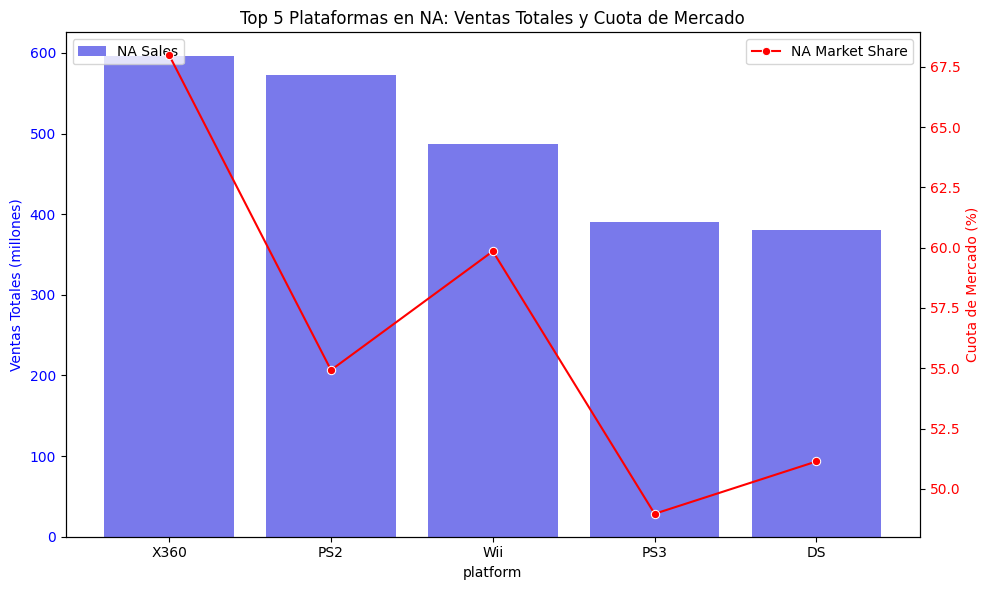

In [23]:
# Datos de las cinco plataformas en NA
data_na = {
    'platform': ['X360', 'PS2', 'Wii', 'PS3', 'DS'],
    'na_sales': [595.74, 572.92, 486.87, 390.13, 380.31],
    'na_market_share': [67.978913, 54.925270, 59.851009, 48.965171, 51.134805]
}

# Crear DataFrame
na_df = pd.DataFrame(data_na)

# Configurar el gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras para las ventas totales
sns.barplot(data=na_df, x='platform', y='na_sales', ax=ax1, color='b', alpha=0.6, label='NA Sales')
ax1.set_ylabel('Ventas Totales (millones)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje para la cuota de mercado
ax2 = ax1.twinx()
sns.lineplot(data=na_df, x='platform', y='na_market_share', ax=ax2, color='r', marker='o', label='NA Market Share')
ax2.set_ylabel('Cuota de Mercado (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Añadir título y leyenda
plt.title('Top 5 Plataformas en NA: Ventas Totales y Cuota de Mercado')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

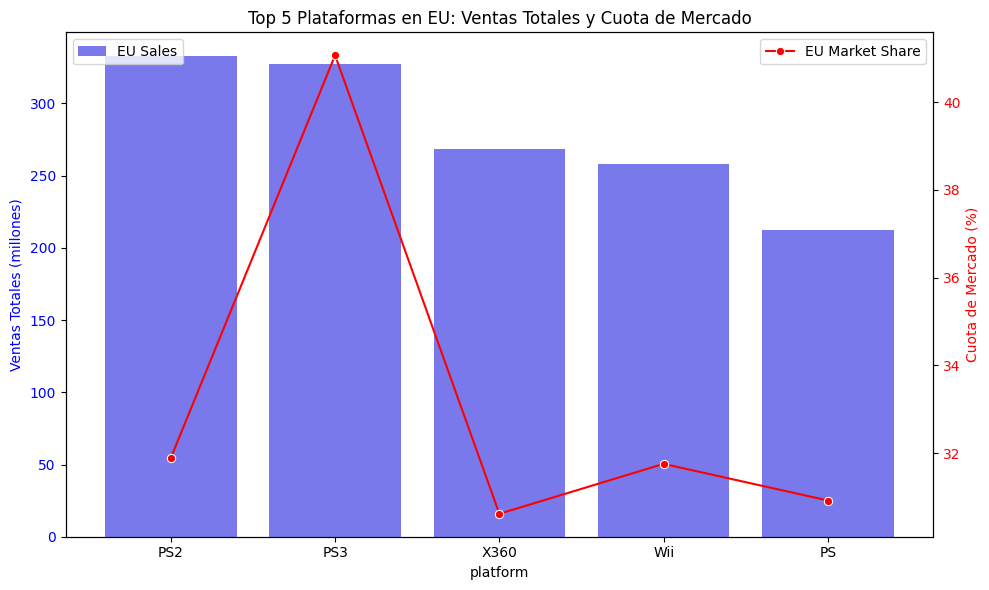

In [24]:
# Datos de las cinco plataformas en EU
data_eu = {
    'platform': ['PS2', 'PS3', 'X360', 'Wii', 'PS'],
    'eu_sales': [332.63, 327.21, 268.32, 258.32, 212.39],
    'eu_market_share': [31.888907, 41.068089, 30.617554, 31.755320, 30.920526]
}

# Crear DataFrame
eu_df = pd.DataFrame(data_eu)

# Configurar el gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras para las ventas totales
sns.barplot(data=eu_df, x='platform', y='eu_sales', ax=ax1, color='b', alpha=0.6, label='EU Sales')
ax1.set_ylabel('Ventas Totales (millones)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje para la cuota de mercado
ax2 = ax1.twinx()
sns.lineplot(data=eu_df, x='platform', y='eu_market_share', ax=ax2, color='r', marker='o', label='EU Market Share')
ax2.set_ylabel('Cuota de Mercado (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Añadir título y leyenda
plt.title('Top 5 Plataformas en EU: Ventas Totales y Cuota de Mercado')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

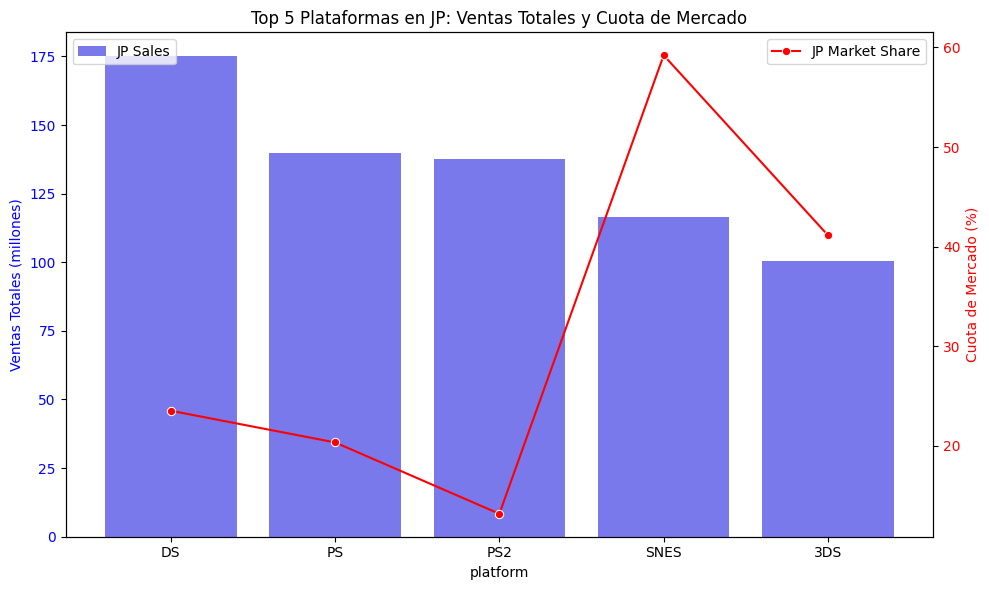

In [25]:
# Datos de las cinco plataformas en JP
data_jp = {
    'platform': ['DS', 'PS', 'PS2', 'SNES', '3DS'],
    'jp_sales': [175.02, 139.78, 137.54, 116.55, 100.62],
    'jp_market_share': [23.532417, 20.349692, 13.185823, 59.216543, 41.146643]
}

# Crear DataFrame
jp_df = pd.DataFrame(data_jp)

# Configurar el gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras para las ventas totales
sns.barplot(data=jp_df, x='platform', y='jp_sales', ax=ax1, color='b', alpha=0.6, label='JP Sales')
ax1.set_ylabel('Ventas Totales (millones)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje para la cuota de mercado
ax2 = ax1.twinx()
sns.lineplot(data=jp_df, x='platform', y='jp_market_share', ax=ax2, color='r', marker='o', label='JP Market Share')
ax2.set_ylabel('Cuota de Mercado (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Añadir título y leyenda
plt.title('Top 5 Plataformas en JP: Ventas Totales y Cuota de Mercado')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Norteamérica (NA):
X360: Domina el mercado con una cuota de mercado del 67.98%, destacándose como la plataforma más popular. Esto indica una preferencia notable por esta consola en la región.
PS2 y Wii: También tienen cuotas significativas (54.93% y 59.85%, respectivamente), pero son notablemente inferiores a las del X360. Esto sugiere que aunque estas plataformas son populares, no alcanzan el mismo nivel de dominio.
PS3 y DS: Tienen cuotas menores, pero siguen siendo relevantes en el mercado. Esto sugiere que los jugadores en NA también utilizan una variedad de consolas.

Europa (UE):
PS2: Se mantiene como la plataforma líder, aunque su cuota es inferior a la de NA con 31.89%. Esto puede indicar una base de usuarios leales, pero también puede reflejar un mercado más fragmentado.
PS3 y X360: Ambas plataformas tienen cuotas comparables (41.07% y 30.62%), indicando una competencia más equilibrada en comparación con NA.
Wii y PS: Tienen cuotas de mercado similares (31.76% y 30.92%), lo que muestra que en Europa las plataformas tienden a estar más equilibradas en términos de popularidad.

Japón (JP):
DS: Es la plataforma más dominante con una cuota de 23.53%, aunque esto es considerablemente menor en comparación con las cuotas en NA. Esto sugiere que el mercado japonés es más diverso y menos centrado en una sola plataforma.
PS: Tiene una cuota de 20.35%, lo que refleja su popularidad, pero sigue siendo menor que las principales plataformas en NA y UE.
PS2: Aunque tiene una cuota de 13.19%, está por debajo de las cuotas en NA y UE, lo que podría reflejar un ciclo de vida más avanzado de esta consola en Japón.
SNES y 3DS: La presencia de consolas más antiguas y nuevas indica que los jugadores en Japón tienden a mantener interés en plataformas más variadas a lo largo del tiempo.

# Los cinco géneros principales por región:

In [26]:
# Agrupar las ventas totales por género y por región
na_genres = games_df.groupby('genre')['na_sales'].sum().nlargest(5)
eu_genres = games_df.groupby('genre')['eu_sales'].sum().nlargest(5)
jp_genres = games_df.groupby('genre')['jp_sales'].sum().nlargest(5)

# Mostrar los resultados
print("Top 5 Géneros en NA:")
print(na_genres)
print("\nTop 5 Géneros en EU:")
print(eu_genres)
print("\nTop 5 Géneros en JP:")
print(jp_genres)

Top 5 Géneros en NA:
genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64

Top 5 Géneros en EU:
genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64

Top 5 Géneros en JP:
genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


Norteamérica (NA)
Los géneros más populares son Action, Sports, y Shooter, con una clara preferencia por los juegos de acción (863.17).
Platform y Misc también son géneros significativos, lo que indica una afinidad por juegos con elementos variados y mecánicas más tradicionales como los juegos de plataformas.
El género Shooter es más relevante en Norteamérica en comparación con las otras dos regiones.

Europa (EU)
Action, Sports, y Shooter son también los géneros principales, pero las ventas son significativamente más bajas que en Norteamérica, con Action generando 510.99 en ventas.
Racing entra en el top 5 de Europa, un género que no está presente en los otros dos mercados principales.
Aunque las tendencias son similares a las de NA, la popularidad de los juegos de carreras muestra una diferencia cultural en términos de preferencias de género.

Japón (JP)
Japón es el único mercado donde Role-Playing (RPG) es el género dominante, con 353.39 en ventas, mostrando una clara preferencia por este tipo de juegos.
Action y Sports siguen siendo relevantes, aunque con menores ventas comparadas con NA y EU.
Platform también aparece con importancia en Japón, lo que refleja el valor continuo de este género en el mercado japonés.
La presencia de RPG como líder en ventas indica diferencias culturales importantes en términos de narrativa y jugabilidad preferida por los jugadores japoneses.

# Análisis para saber si las clasificaciones de la columna 'rating' afectan las ventas en regiones individuales

In [27]:
# Filtrar los datos eliminando los valores nulos en la columna 'rating'
filtered_games_df = games_df.dropna(subset=['rating'])

# Convertir la columna 'rating' a un tipo categórico si aún no lo está
filtered_games_df['rating'] = filtered_games_df['rating'].astype('category')

# Crear una tabla pivotando las ventas por región y la clasificación (rating)
rating_sales_na = filtered_games_df.groupby('rating')['na_sales'].mean()
rating_sales_eu = filtered_games_df.groupby('rating')['eu_sales'].mean()
rating_sales_jp = filtered_games_df.groupby('rating')['jp_sales'].mean()

# Mostrar los resultados
print("Promedio de ventas en NA por clasificación de rating:")
print(rating_sales_na)
print("\nPromedio de ventas en EU por clasificación de rating:")
print(rating_sales_eu)
print("\nPromedio de ventas en JP por clasificación de rating:")
print(rating_sales_jp)

# Calcular la correlación entre 'rating' y ventas en cada región
# Asignar valores numéricos a la columna 'rating' para calcular la correlación
filtered_games_df['rating_code'] = filtered_games_df['rating'].cat.codes

correlation_na = filtered_games_df['rating_code'].corr(filtered_games_df['na_sales'])
correlation_eu = filtered_games_df['rating_code'].corr(filtered_games_df['eu_sales'])
correlation_jp = filtered_games_df['rating_code'].corr(filtered_games_df['jp_sales'])

# Mostrar las correlaciones
print("\nCorrelación entre 'rating' y ventas en NA:", correlation_na)
print("Correlación entre 'rating' y ventas en EU:", correlation_eu)
print("Correlación entre 'rating' y ventas en JP:", correlation_jp)

Promedio de ventas en NA por clasificación de rating:
rating
AO      1.260000
E       0.235923
E10+    0.248026
EC      0.191250
K-A     0.853333
M       0.483652
RP      0.000000
T       0.257349
Name: na_sales, dtype: float64

Promedio de ventas en EU por clasificación de rating:
rating
AO      0.610000
E       0.123952
E10+    0.131622
EC      0.013750
K-A     0.090000
M       0.312500
RP      0.030000
T       0.145194
Name: eu_sales, dtype: float64

Promedio de ventas en JP por clasificación de rating:
rating
AO      0.000000
E       0.097641
E10+    0.028859
EC      0.000000
K-A     0.486667
M       0.041393
RP      0.000000
T       0.051876
Name: jp_sales, dtype: float64

Correlación entre 'rating' y ventas en NA: 0.037973452632141365
Correlación entre 'rating' y ventas en EU: 0.04990668435799873
Correlación entre 'rating' y ventas en JP: -0.06249113826100267


En NA (Norteamérica), los juegos con clasificación AO (Adults Only) tienen el promedio más alto de ventas, seguido de K-A (Kids to Adults) y M (Mature). Las clasificaciones E (Everyone) y E10+ (Everyone 10 and up) tienen ventas más bajas.
En EU (Europa), los juegos con clasificación AO también lideran el promedio de ventas, pero con un margen mucho menor que en NA. Las ventas son más distribuidas entre las clasificaciones M, E, y E10+.
En JP (Japón), los juegos con clasificación K-A tienen el mayor promedio de ventas, seguidos por E y T. Las ventas para las otras clasificaciones son considerablemente menores o inexistentes.

En NA, la correlación entre las clasificaciones de 'rating' y las ventas es baja (0.0379), lo que sugiere que las clasificaciones tienen poco impacto en las ventas totales.
En EU, la correlación también es baja (0.0499), lo que indica una ligera influencia de las clasificaciones en las ventas, pero nada significativo.
En JP, la correlación es negativa (-0.0625), lo que indica una relación inversa muy débil: es decir, cuanto más alto es el valor del 'rating', menores son las ventas, aunque esta relación es casi insignificante.

# Prueba de hipótesis

Hipótesis: — Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

In [28]:
import scipy.stats as stats

# Filtrar los datos para Xbox One y PC
xbox_one_scores = games_df[games_df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = games_df[games_df['platform'] == 'PC']['user_score'].dropna()

# Realizar la prueba t de Student
t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

# Mostrar los resultados
print("Estadístico t:", t_stat)
print("Valor p:", p_value)

# Evaluar la hipótesis nula
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son significativamente diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")

Estadístico t: -4.130104504358504
Valor p: 4.3968409560037004e-05
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son significativamente diferentes.


Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son significativamente diferentes. El valor p es mucho menor que el nivel de significancia estándar de 0.05, lo que sugiere que existe una diferencia estadísticamente significativa en las calificaciones de usuario entre estas dos plataformas.

Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales. 
    
Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes. Es una prueba de dos colas, donde se espera que haya una diferencia en cualquier dirección (ya sea Xbox One tenga mayores calificaciones que PC o viceversa).

La prueba t de Student es adecuada para comparar medias entre dos grupos, especialmente cuando el tamaño de las muestras es moderado y las distribuciones siguen aproximadamente una distribución normal. Nos permite determinar si las diferencias observadas entre los promedios son debidas al azar o son estadísticamente significativas.

Hipótesis: — Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [29]:
# Filtrar los datos para los géneros Acción y Deportes
accion_scores = games_df[games_df['genre'] == 'Action']['user_score'].dropna()
deportes_scores = games_df[games_df['genre'] == 'Sports']['user_score'].dropna()

# Prueba t de Student para dos muestras independientes
t_stat, p_value = stats.ttest_ind(accion_scores, deportes_scores)

# Mostrar el estadístico t y el valor p
print("Estadístico t:", t_stat)
print("Valor p:", p_value)

# Evaluar el resultado
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son significativamente diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay suficientes evidencias para concluir que las calificaciones promedio de los géneros de Acción y Deportes sean diferentes.")

Estadístico t: 0.5749833308868352
Valor p: 0.5653256242787754
No podemos rechazar la hipótesis nula: No hay suficientes evidencias para concluir que las calificaciones promedio de los géneros de Acción y Deportes sean diferentes.


Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
    
Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

El valor p obtenido es 0.565, mucho mayor que el nivel de significancia típico de 0.05. Esto significa que la diferencia observada entre las calificaciones promedio de los dos géneros no es lo suficientemente grande como para ser estadísticamente significativa.

En otras palabras, los datos no proporcionan suficiente evidencia para concluir que los usuarios valoren de manera diferente los juegos de Acción frente a los de Deportes.

# Conclusión general

En este proyecto, he analizado las ventas y la calificación de videojuegos. Los datos se han fragmentado en plataforma, género y región. Además, examiné la influencia de aspectos como las opiniones de los usuarios y críticos en las ventas mundiales. 

Análisis de plataformas: Xbox 360, PS2, PS3, Wii y DS son las principales en ventas en varias regiones, aunque la cuota en el mercado difiere de una a otra. Por ejemplo: Xbox 360 es el líder indiscutible en América del Norte. Pero su presencia en Europa y Japón no es igual a la de PS en América del Norte; La DS está a la cabeza en Japón con la mayor cuota de mercado.

Se analizaron las ventas promedio por clasificación de rating (E, T, M, etc.) en las distintas regiones. Las clasificaciones de juegos no muestran una gran variación significativa en las ventas entre regiones.

En general, los juegos con clasificaciones más amigables para todas las edades (E y E10+) son los que más ventas generan.

El análisis muestra que factores como la región, el género de los juegos y las reseñas profesionales tienen un impacto considerable en las ventas de videojuegos. Las diferencias culturales juegan un papel importante en las preferencias de los jugadores, y mientras que las reseñas de los críticos son influyentes, las de los usuarios no lo son tanto en las ventas.